In [ ]:
import pandas as pd
# Load the Excel file
df= pd.read_excel(r"C:\Users\hp\Dono\Review-1\Data_preprocessing_case_study\Data.xlsx")

df.head()


,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted
0,10000.0,2018-07-01 00:00:00,credit_card,690.0,14.22,305xx,GA,10+ years,1
1,1000.0,24-05-2011,major_purchase,466.0,0.28,881xx,NM,< 1 year,0
2,20000.0,2015-05-01 00:00:00,credit_card,685.0,22.26,370xx,TN,10+ years,1
3,16000.0,2018-05-01 00:00:00,debt_consolidation,730.0,12.99,075xx,NJ,1 year,1
4,14000.0,2016-11-01 00:00:00,debt_consolidation,720.0,10.86,347xx,FL,10+ years,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165464 entries, 0 to 165463
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount.Requested      165463 non-null  float64
 1   Application.Date      165463 non-null  object 
 2   Loan.Title            165462 non-null  object 
 3   Risk_Score            151980 non-null  float64
 4   Debt.To.Income.Ratio  165361 non-null  float64
 5   Zip.Code              165460 non-null  object 
 6   State                 165461 non-null  object 
 7   Employment.Length     157022 non-null  object 
 8   Accepted              165464 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 11.4+ MB


In [ ]:
#Q1
# Remove the percentage symbol
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].replace("%", "")
#convert into float-Single accuracy
df['Debt.To.Income.Ratio']=df['Debt.To.Income.Ratio'].astype('float32')

In [ ]:
#Q2
# Convert the date column to dd-mm-yyyy
df['Application.Date'] = pd.to_datetime(df['Application.Date']).dt.strftime('%d-%m-%Y')



C:\Users\hp\AppData\Local\Temp\ipykernel_22092\122649452.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Application.Date'] = pd.to_datetime(df['Application.Date']).dt.strftime('%d-%m-%Y')


In [ ]:
df[:5]

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted
0,10000.0,01-07-2018,credit_card,690.0,14.22,305xx,GA,10+ years,1
1,1000.0,24-05-2011,major_purchase,466.0,0.28,881xx,NM,< 1 year,0
2,20000.0,01-05-2015,credit_card,685.0,22.26,370xx,TN,10+ years,1
3,16000.0,01-05-2018,debt_consolidation,730.0,12.99,075xx,NJ,1 year,1
4,14000.0,01-11-2016,debt_consolidation,720.0,10.86,347xx,FL,10+ years,1


In [ ]:
#Q3
print(df['Application.Date'].dtype)


object


In [ ]:
 #convert the datatype into date type
df['Application.Date'] = pd.to_datetime(df['Application.Date'])
#convert into data time format
#df['Application.Date'] = pd.to_datetime(df['Application.Date'],format="%d-%m-%Y")
df['month'] = df['Application.Date'].dt.month
df['year'] = df['Application.Date'].dt.year

C:\Users\hp\AppData\Local\Temp\ipykernel_22092\816507936.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Application.Date'] = pd.to_datetime(df['Application.Date'])


In [ ]:
df.head()

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,month,year
0,10000.0,2018-01-07,credit_card,690.0,14.22,305xx,GA,10+ years,1,1.0,2018.0
1,1000.0,2011-05-24,major_purchase,466.0,0.28,881xx,NM,< 1 year,0,5.0,2011.0
2,20000.0,2015-01-05,credit_card,685.0,22.26,370xx,TN,10+ years,1,1.0,2015.0
3,16000.0,2018-01-05,debt_consolidation,730.0,12.99,075xx,NJ,1 year,1,1.0,2018.0
4,14000.0,2016-01-11,debt_consolidation,720.0,10.86,347xx,FL,10+ years,1,1.0,2016.0


In [ ]:
df.shape

(165464, 11)

In [ ]:
#Q4
sorted_df = df.sort_values('Risk_Score', ascending=False)
sorted_df[:5]


,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,month,year
100973,20000.0,2016-04-16,Credit card refinancing,926.0,0.7102,114xx,NY,NaN,0,4.0,2016.0
33050,40000.0,2016-04-11,small_business,904.0,0.0494,913xx,CA,< 1 year,0,4.0,2016.0
79246,6000.0,2016-04-21,other,904.0,0.1075,913xx,CA,< 1 year,0,4.0,2016.0
150037,3000.0,2016-04-21,debt_consolidation,883.0,0.0231,606xx,IL,2 years,0,4.0,2016.0
128030,17000.0,2016-04-08,home_improvement,857.0,0.1930,453xx,OH,NaN,0,4.0,2016.0


In [ ]:
#Q5
filtered_data = sorted_df[(sorted_df['State'] == 'TX') & (sorted_df['Accepted'] == 0)]

In [ ]:
filtered_data[:5]
len(filtered_data)


4346

4346 applicants hail from Texas state whose loan applications were rejected.

In [ ]:
#Q6
df_sortratio = sorted_df[(sorted_df['Debt.To.Income.Ratio'] >=0) & (sorted_df['Debt.To.Income.Ratio'] <= 99.99)]
df_sortratio[:5]

,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,month,year
100973,20000.0,2016-04-16,Credit card refinancing,926.0,0.7102,114xx,NY,NaN,0,4.0,2016.0
33050,40000.0,2016-04-11,small_business,904.0,0.0494,913xx,CA,< 1 year,0,4.0,2016.0
79246,6000.0,2016-04-21,other,904.0,0.1075,913xx,CA,< 1 year,0,4.0,2016.0
150037,3000.0,2016-04-21,debt_consolidation,883.0,0.0231,606xx,IL,2 years,0,4.0,2016.0
128030,17000.0,2016-04-08,home_improvement,857.0,0.1930,453xx,OH,NaN,0,4.0,2016.0


In [ ]:
df_sortratio.shape

(163122, 11)

In [ ]:
#Q7
df_sortrisk=df_sortratio[(df_sortratio['Risk_Score'] >=350) & (df_sortratio['Risk_Score'] <= 850)]
df_sortrisk.shape

(149032, 11)

In [ ]:
clean_df=df_sortrisk

In [ ]:
#Q8
t1 = clean_df[clean_df['Accepted'] == 1]['Amount.Requested'].sum()
print("Total loan amount requested by accepted applicants:", t1)
t2 = clean_df[clean_df['Accepted'] == 0]['Amount.Requested'].sum()
print("Total loan amount requested by rejected applicants:", t2)

Total loan amount requested by accepted applicants: 1696746450.0
Total loan amount requested by rejected applicants: 481530850.0


In [ ]:
#Q9
count_status=df['Accepted'].value_counts()
print(count_status)

1    113212
0     52252
Name: Accepted, dtype: int64


In [ ]:
print("Total Accepted Applicants:",count_status[1])
print("Total Rejected Applicants:",count_status[0])

Total Accepted Applicants: 113212
Total Rejected Applicants: 52252


In [ ]:
#Q10
avg_sc=clean_df[clean_df['State'] == 'CA']['Risk_Score'].mean()
print("Average Score for california Applicants:", avg_sc)

Average Score for california Applicants: 686.4588506649654


In [ ]:
#Q11
#use max function
#clean_df[clean_df['Employment.Length']=='7 years']['Amount.Requested'].max()
#or
#Use sort_values function
loan_filter=clean_df[clean_df['Employment.Length']=='7 years'].sort_values('Amount.Requested',ascending=False)
print("The highest loan amount requested by an applicant who has a job experience of 7 years:",loan_filter.iloc[0]['Amount.Requested'])

The highest loan amount requested by an applicant who has a job experience of 7 years: 40000.0


In [ ]:
#Q12
count_state=clean_df['State'].value_counts()
print("The state with highest number of applicants: ",count_state.idxmax())
print("number of applicants: ",count_state.max())


The state with highest number of applicants:  CA
number of applicants:  20377


In [ ]:
#Q13
clean_df['Applicant_id'] = range(1, len(clean_df) + 1)
clean_df[:5]

C:\Users\hp\AppData\Local\Temp\ipykernel_22092\3306875231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Applicant_id'] = range(1, len(clean_df) + 1)


,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,month,year,Applicant_id
60159,10000.0,2012-07-11,car,850.0,0.003100,079xx,NJ,1 year,0,7.0,2012.0,1
88236,40000.0,2016-04-18,debt_consolidation,847.0,0.638600,303xx,GA,< 1 year,0,4.0,2016.0,2
137359,15000.0,2016-04-01,home_improvement,847.0,0.213500,301xx,GA,< 1 year,0,4.0,2016.0,3
10978,18000.0,2016-01-02,home_improvement,845.0,13.350000,945xx,CA,NaN,1,1.0,2016.0,4
34995,10000.0,2018-01-05,medical,845.0,19.379999,971xx,OR,10+ years,1,1.0,2018.0,5


In [ ]:
#set the application id at the beginning
clean_df.insert(0, 'Applicant_id', clean_df.pop('Applicant_id'))
clean_df[:5]

,Applicant_id,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,month,year
60159,1,10000.0,2012-07-11,car,850.0,0.003100,079xx,NJ,1 year,0,7.0,2012.0
88236,2,40000.0,2016-04-18,debt_consolidation,847.0,0.638600,303xx,GA,< 1 year,0,4.0,2016.0
137359,3,15000.0,2016-04-01,home_improvement,847.0,0.213500,301xx,GA,< 1 year,0,4.0,2016.0
10978,4,18000.0,2016-01-02,home_improvement,845.0,13.350000,945xx,CA,NaN,1,1.0,2016.0
34995,5,10000.0,2018-01-05,medical,845.0,19.379999,971xx,OR,10+ years,1,1.0,2018.0


In [ ]:
#Q14

ratio= clean_df[clean_df['Applicant_id'] == 1089]['Debt.To.Income.Ratio']
print(ratio.iloc[0])

16.24


In [ ]:
#Q15
lookup_table = {'NJ': 'Northeast','GA': 'Southeast','CA': 'West','OR': 'West','LA': 'South','FL': 'Southeast','AK': 'West',
    'CT': 'Northeast','MA': 'Northeast','MS': 'South','TX': 'South','NY': 'Northeast','AZ': 'West','MT': 'West','MD': 'Northeast',
    'AR': 'South','MN': 'Midwest','OK': 'South','UT': 'West','NE': 'Midwest','IL': 'Midwest','IN': 'Midwest','VA': 'South',
    'MI': 'Midwest','RI': 'Northeast','ND': 'Midwest','HI': 'West','TN': 'South','PA': 'Northeast','CO': 'West','WI': 'Midwest',
    'AL': 'South','OH': 'Midwest','NC': 'South','KY': 'South','NH': 'Northeast','MO': 'Midwest','SC': 'South','WA': 'West',
    'VT': 'Northeast','DC': 'Northeast','KS': 'Midwest','NV': 'West','DE': 'Northeast','NM': 'West','WV': 'South',
    'WY': 'West','ME': 'Northeast','ID': 'West','SD': 'Midwest','IA': 'Midwest'}


clean_df['Region'] = clean_df['State'].map(lookup_table)
clean_df[:5]

C:\Users\hp\AppData\Local\Temp\ipykernel_22092\1071710587.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Region'] = clean_df['State'].map(lookup_table)


,Applicant_id,Amount.Requested,Application.Date,Loan.Title,Risk_Score,Debt.To.Income.Ratio,Zip.Code,State,Employment.Length,Accepted,month,year,Region
60159,1,10000.0,2012-07-11,car,850.0,0.003100,079xx,NJ,1 year,0,7.0,2012.0,Northeast
88236,2,40000.0,2016-04-18,debt_consolidation,847.0,0.638600,303xx,GA,< 1 year,0,4.0,2016.0,Southeast
137359,3,15000.0,2016-04-01,home_improvement,847.0,0.213500,301xx,GA,< 1 year,0,4.0,2016.0,Southeast
10978,4,18000.0,2016-01-02,home_improvement,845.0,13.350000,945xx,CA,NaN,1,1.0,2016.0,West
34995,5,10000.0,2018-01-05,medical,845.0,19.379999,971xx,OR,10+ years,1,1.0,2018.0,West


In [ ]:
#Q16
reason= clean_df[clean_df['Applicant_id'] == 132467]['Loan.Title']
print(reason.iloc[0])

vacation


In [ ]:
#Q17
#any rows that contain missing values will be treated as False
indices = clean_df[clean_df['Loan.Title'].str.lower().str.contains('credit', na=False)].index.tolist()
print(len(indices))

29210


In [ ]:
reason_count_dict = {}
for index, row in clean_df.iterrows():
    reason = row['Loan.Title']

    # Update the count for the reason in the dictionary
    reason_count_dict[reason] = reason_count_dict.get(reason, 0) + 1
print(len(reason_count_dict))


credit_count = 0
for k,v in reason_count_dict.items():
    # Check if the key contains the word 'credit'
    if 'credit' in str(k).lower().strip():
        print(k)
        credit_count += reason_count_dict[k]


print("Count of words containing 'credit':", credit_count)


3521
credit_card
pay off high interst credit cards
Credit Diversification Loan
Pay Down Credit Card Debt
Credit Card Refinance
Credit Card Refinance/Consolidation
Paying off credit cards...
credit card consolidation
credit cards
Credit Card Refinancing
credit card pay off
Personal Loan, Excellent Credit Score
Credit Card debts
Credit card and Car payoff
Credit Card 
Credit card refinancing
Pay off credits cards
Credit Card Loan
credit card debt
credit card refinance
Credit Card Consolidation
Credit Card Payoff
Amex credit card loan
Credit Card Debt Consolidation
Consolidate Credit Cards
Credit Card Refi
improve my credit score
Visa Credit Card Refinance
Credit worthy borrower needs extra $
credit_card Loan
Looking to pay off high rate credit card
Payoff higher interest credit cards
refinance credit debt to better rate
Credit Loan
Paying off Father and $1300 Credit Card
credit card payment help
Credit swap
Credit Card & Masters
Cut up credit cards-Debt consolidation
My Credit card refin

In [ ]:
#Q18

#H0:There is no significant difference in the mean loan amounts between high-risk and low-risk loan applicants.
#H1:There is a significant difference in the mean loan amounts between high-risk and low-risk loan applicants.

import scipy.stats as stats
high_risk_loans = clean_df[clean_df['Risk_Score'] > 600]
low_risk_loans = clean_df[clean_df['Risk_Score'] <= 600]

#  t-test
t_statistic, p_value = stats.ttest_ind(high_risk_loans['Amount.Requested'], low_risk_loans['Amount.Requested'], equal_var=False)
alpha=0.05
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis.So there is a significant difference in the mean loan amounts between high-risk and low-risk loan applicants.")
else:
    print("Fail to reject the null hypothesis. So there is no significant difference in the mean loan amounts between high-risk and low-risk loan applicants.")


T-statistic: 65.43315085327133
P-value: 0.0
Reject the null hypothesis.So there is a significant difference in the mean loan amounts between high-risk and low-risk loan applicants.


In [ ]:
#Q19
#H0: The risk factor does not significantly impact the loan amount requested by loan applicants.
#H1: The risk factor significantly impacts the loan amount requested by loan applicants.

high_risk_amounts = clean_df[clean_df['Risk_Score'] >= 500]['Amount.Requested']
low_risk_amounts = clean_df[clean_df['Risk_Score'] < 500]['Amount.Requested']
# t-test
t_statistic, p_value = stats.ttest_ind(high_risk_amounts, low_risk_amounts)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis.So the risk factor significantly impacts the loan amount requested by loan applicants.")
else:
    print("Fail to reject the null hypothesis. So the risk factor significantly impacts the loan amount requested by loan applicants.")

T-statistic: 32.64345604221602
P-value: 6.630492845827613e-233
Reject the null hypothesis.So the risk factor significantly impacts the loan amount requested by loan applicants.


In [ ]:
#Q20
#H0: The risk factor does not have a significant impact on the likelihood of loan acceptance.
#H1: The risk factor has a significant impact on the likelihood of loan acceptance.
from scipy.stats import chi2_contingency

# Create a contingency table
tab_value= pd.crosstab(clean_df['Risk_Score'], clean_df['Accepted'])
print(tab_value)
# chi-square test on proportions
chi2, p_value, _, _ = chi2_contingency(tab_value)
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
alpha=0.05
if p_value < alpha:
    print("Reject the null hypothesis.So the risk factor has a significant impact on the likelihood of loan acceptance.")
else:
    print("Fail to reject the null hypothesis. So  the risk factor does not have a significant impact on the likelihood of loan acceptance")

Accepted    0   1
Risk_Score       
373.0       1   0
375.0       1   0
385.0       2   0
386.0       1   0
389.0       1   0
...        ..  ..
842.0       1   0
844.0       1   0
845.0       0  26
847.0       2   0
850.0       1   0

[446 rows x 2 columns]
Chi-square statistic: 132288.20551542687
P-value: 0.0
Reject the null hypothesis.So the risk factor has a significant impact on the likelihood of loan acceptance.


In [ ]:
#Q21.a

#Filter the data for the years
filtered_data = clean_df[clean_df['year'].isin([2008, 2009,2010])]
#Create a PivotTable
pivot_table = filtered_data.pivot_table(values='Amount.Requested', index='State', aggfunc='mean').sort_values('Amount.Requested',ascending=False)
#Find the state with the highest average amount requested:
highest_avg_amount_state = pivot_table.idxmax().iloc[0]
print(pivot_table )
print("The state had the highest average amount requested in 2008,2009,2010 :",highest_avg_amount_state)

       Amount.Requested
State                  
AK         13857.894737
SD         12693.055556
MT         12551.851852
HI         12320.000000
NJ         12088.553371
NC         11891.776316
UT         11729.794521
DE         11601.388889
CA         11485.795900
MA         11243.197073
NY         11194.314790
NV         11110.294118
IL         11050.327711
CT         11046.026490
VA         11015.582192
PA         10970.658708
DC         10940.740741
OR         10827.352941
FL         10723.338279
CO         10632.726726
NH         10546.484375
OH         10480.264370
NM         10373.809524
GA         10324.229692
MI         10253.235294
MD         10220.955882
AZ         10129.972376
MN         10093.112782
SC         10056.462585
KY         10028.928571
TX          9977.073964
WY          9846.153846
VT          9804.347826
WV          9794.520548
WA          9785.393258
RI          9760.256410
LA          9735.398551
AL          9655.092593
WI          9654.629630
OK          9584

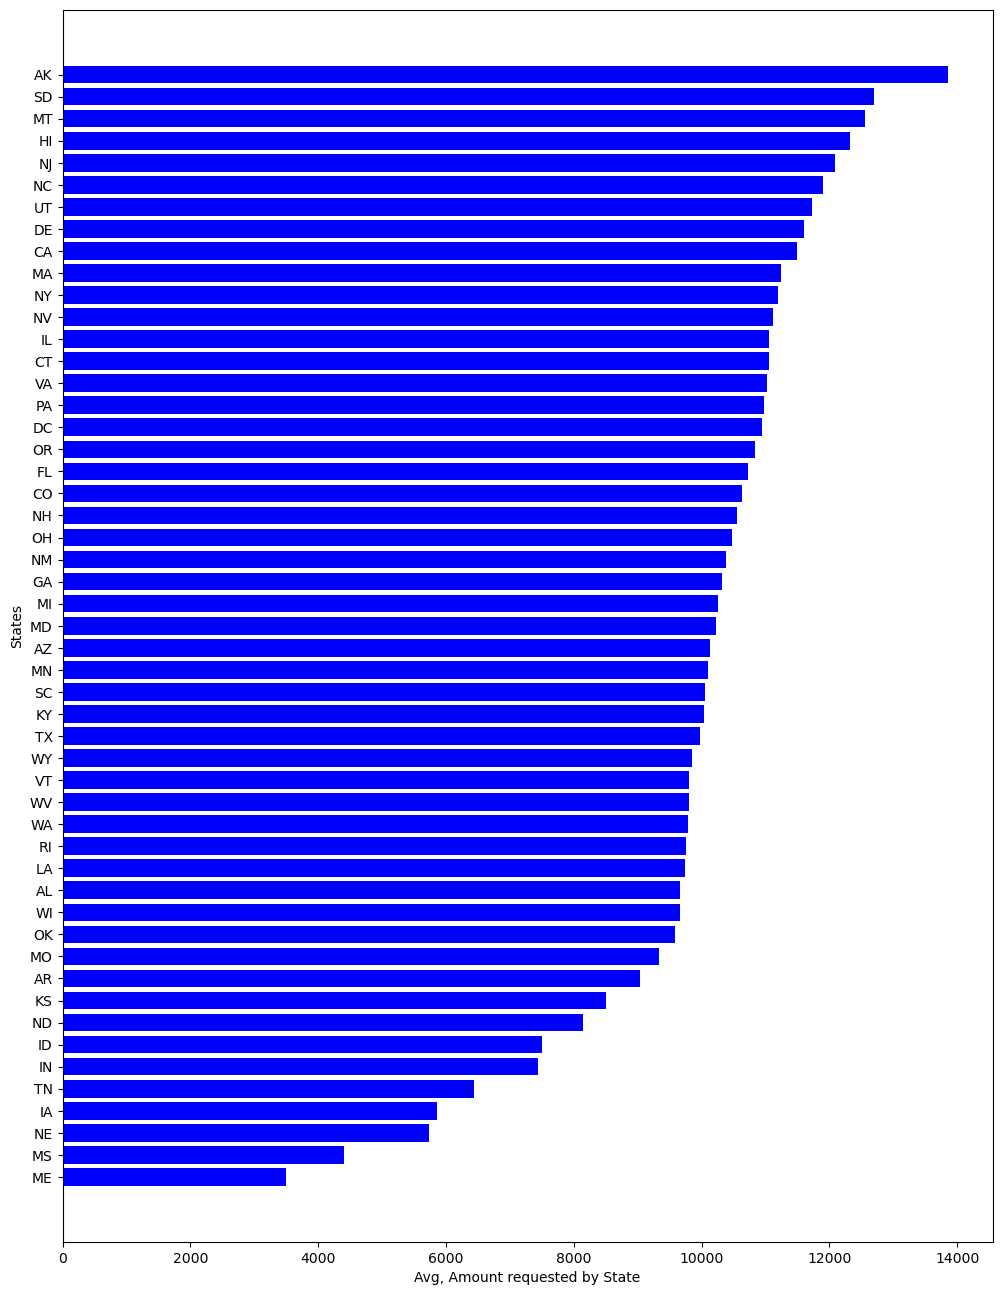

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 16))

# Sort the pivot table by the requested amount
pivot_table1_sorted = pivot_table.sort_values(by='Amount.Requested', ascending=True)
states = pivot_table1_sorted.index.tolist()
accumulated_values = pivot_table1_sorted['Amount.Requested'].tolist()
# Plot the horizontal bar chart
bar_color = 'blue'
plt.barh(states, accumulated_values,color=bar_color)

plt.xlabel('Avg, Amount requested by State')
plt.ylabel('States')
#plt.title('Accumulated Value by State')
plt.show()

In [ ]:
#21.b

#Filter the data for the years
filtered_data1 = clean_df[clean_df['year'].isin([2008, 2009,2010])]
#Create a PivotTable
pivot_table1 = filtered_data1.pivot_table(values='Amount.Requested', index='State', aggfunc='sum').sort_values('Amount.Requested',ascending=False)
#Find the state with the highest average amount requested:
highest_amt_state = pivot_table1.idxmax().iloc[0]
print(pivot_table1 )
print("The state had the highest amount requested in 2008,2009,2010 :",highest_amt_state)

       Amount.Requested
State                  
CA          14173472.14
NY           8250210.00
FL           7227530.00
TX           6744502.00
PA           5178150.91
IL           4585886.00
NJ           4303525.00
OH           3741454.38
GA           3685750.00
VA           3216550.00
MD           2780100.00
MA           2765826.48
MI           2614575.00
AZ           1833525.00
CO           1786298.09
WA           1741800.00
MO           1726180.00
CT           1667950.00
AL           1564125.00
SC           1478300.00
KY           1404050.00
LA           1343485.00
MN           1342384.00
WI           1303375.00
NV           1133250.00
OK           1073471.00
OR            920325.00
NC            903775.00
UT            856275.00
AR            830550.00
WV            715000.00
NH            674975.00
HI            492800.00
NM            435700.00
DE            417650.00
KS            399600.00
RI            380650.00
MT            338900.00
DC            295400.00
AK            26

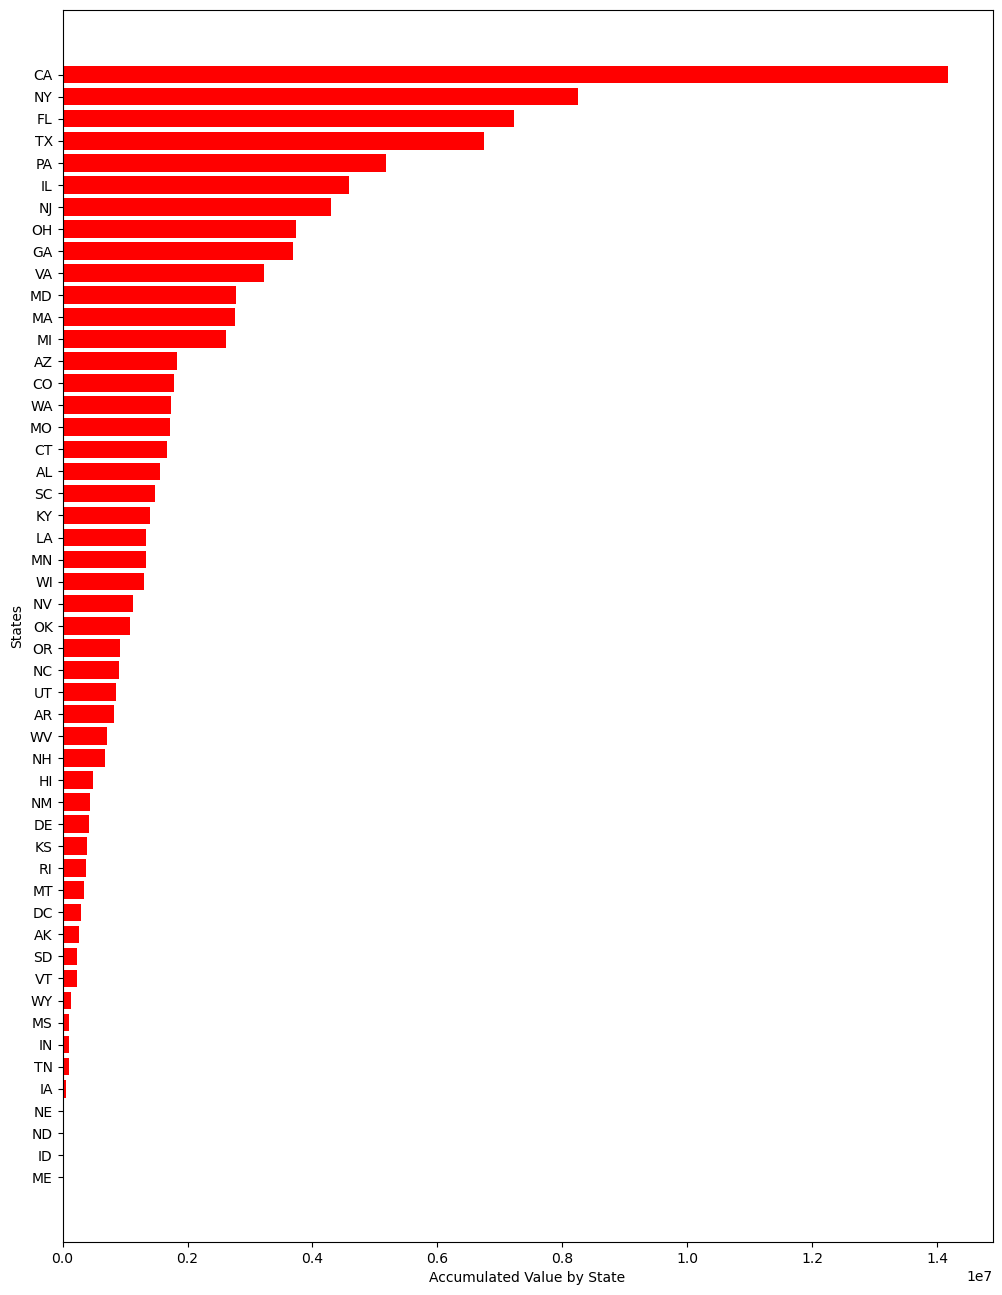

In [ ]:
plt.figure(figsize=(12, 16))

# Sort the pivot table by the amount requested
pivot_table1_sorted = pivot_table1.sort_values(by='Amount.Requested', ascending=True)
states = pivot_table1_sorted.index.tolist()
accumulated_values = pivot_table1_sorted['Amount.Requested'].tolist()
# Plot the horizontal bar chart
bar_color = 'red'
plt.barh(states, accumulated_values,color=bar_color)

plt.xlabel('Accumulated Value by State')
plt.ylabel('States')
#plt.title('Accumulated Value by State')
plt.show()


In [ ]:
#Q22
pivot_table = pd.pivot_table(clean_df, values='Risk_Score', index='Employment.Length', columns='Accepted', aggfunc='max')
pivot_table

Accepted,0,1
Employment.Length,,
1 year,850.0,840.0
10+ years,821.0,845.0
2 years,814.0,835.0
3 years,808.0,835.0
4 years,817.0,845.0
5 years,822.0,835.0
6 years,815.0,840.0
7 years,820.0,845.0
8 years,807.0,845.0


Regardless of the years of experience, the highest risk score among the applicants who have been accepted for a loan falls
under the range of 835 to 845.

In [ ]:
pivot_table = pd.pivot_table(clean_df, values='Risk_Score', index='Employment.Length', columns='Accepted', aggfunc='min')
pivot_table

Accepted,0,1
Employment.Length,,
1 year,375.0,645.0
10+ years,385.0,645.0
2 years,408.0,645.0
3 years,405.0,640.0
4 years,396.0,645.0
5 years,412.0,640.0
6 years,417.0,640.0
7 years,394.0,655.0
8 years,391.0,655.0


Irrespective of the years of experience, the lowest risk score among the applicants who have been accepted for a loan
falls under the range of 640 to 655.

In [ ]:
pivot_table = pd.pivot_table(clean_df, values='Risk_Score', index='Employment.Length', columns='Accepted', aggfunc='count')
pivot_table

Accepted,0,1
Employment.Length,,
1 year,1115,7477
10+ years,1873,37232
2 years,1200,10154
3 years,994,9127
4 years,698,6782
5 years,676,7106
6 years,502,5243
7 years,357,4685
8 years,330,4562


Loan applicants with over 10 years of experience have a higher likelihood of getting their loans approved compared to applicants with less experience.

<Axes: xlabel='Debt.To.Income.Ratio', ylabel='Density'>

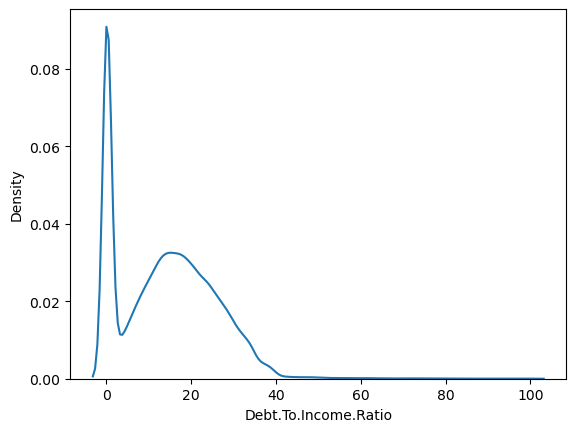

In [ ]:
#Q23
import seaborn as sns
sns.kdeplot(clean_df["Debt.To.Income.Ratio"])

In [ ]:
import numpy as np
majority_range = np.percentile(clean_df["Debt.To.Income.Ratio"], [5, 95])
print("Range of Debt.To.Income.Ratio of loan applicants: ", majority_range)

Range of Debt.To.Income.Ratio of loan applicants:  [ 0.0632     32.56000137]


In [ ]:
#Confirmation
ratio_range = clean_df[(clean_df["Debt.To.Income.Ratio"] >=0.0632) & (clean_df["Debt.To.Income.Ratio"]<= 32.56)]
print(len(ratio_range))

134141


Debt.To.Income.Ratio of 134141 loan applicants fall in the range of 0.0632 and 32.56000137

<Axes: xlabel='Amount.Requested', ylabel='Risk_Score'>

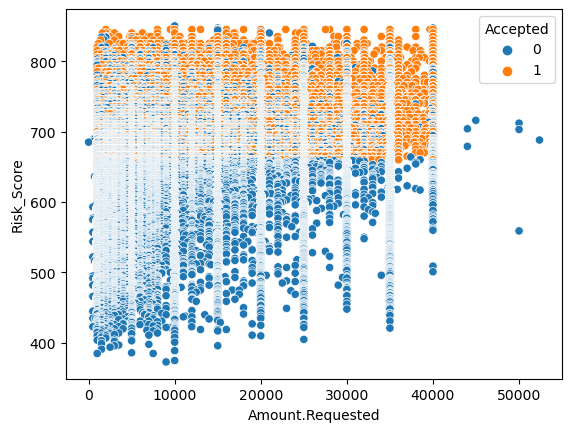

In [ ]:
#Q24
sns.scatterplot(data=clean_df, x="Amount.Requested", y="Risk_Score", hue="Accepted")

<Axes: xlabel='Amount.Requested', ylabel='Risk_Score'>

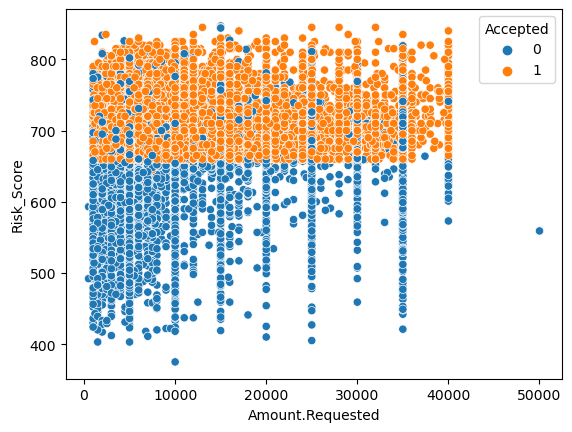

In [ ]:
sample = clean_df.sample(25000)
sns.scatterplot(data=sample, x="Amount.Requested", y="Risk_Score", hue="Accepted")

<Axes: xlabel='year', ylabel='Amount.Requested'>

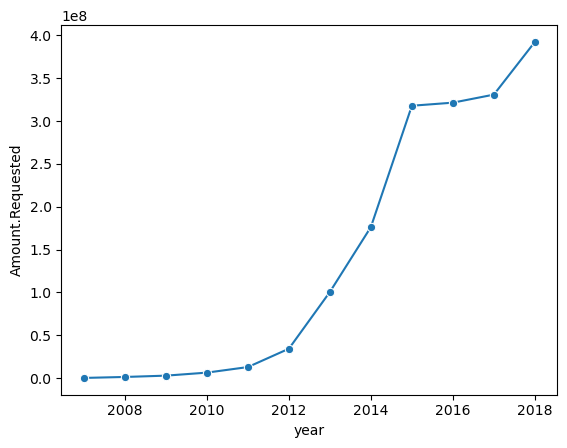

In [ ]:
#Q25
# Group the data by year and calculate the sum of accepted amounts
yearly_accept_total = clean_df[clean_df["Accepted"] == 1].groupby("year")["Amount.Requested"].sum()
year_accept= yearly_accept_total.sort_index()
sns.lineplot(data=year_accept, marker='o')

The highest loan amount was sanctioned in the year 2018